### **Data Cleaning and Preprocessing**

- Handling inconsistent data formats.
- Dealing with duplicate entries.
- Correcting obvious errors in the data.

### **Handling Missing Values and Outliers**

- Techniques for imputing missing values (e.g., mean imputation, forward fill, backward fill).
- Methods for detecting and dealing with outliers (e.g., Z-score method, IQR method).
- Consideration of domain knowledge in handling anomalies

In [5]:
# Time Series Data Preparation: Cleaning, Preprocessing, and Handling Anomalies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')

**We will create mock data for this analysis.**

In [8]:
# Load sample data  for demonstration
def load_sample_data():
    dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
    np.random.seed(42)
    values = np.random.randn(len(dates)) * 10 + 100
    df = pd.DataFrame({'Date': dates, 'Value': values})
    
    # Introduce some issues for demonstration
    df.loc[10:20, 'Value'] = np.nan  # Missing values
    df.loc[50, 'Value'] = 1000  # Outlier
    df = df.append(df.iloc[100])  # Duplicate entry
    df.loc[200, 'Date'] = '2022-07-20'  # Inconsistent date format
    return df

df = load_sample_data()
print(df.head())
print(f"Original shape: {df.shape}")

        Date       Value
0 2022-01-01  104.967142
1 2022-01-02   98.617357
2 2022-01-03  106.476885
3 2022-01-04  115.230299
4 2022-01-05   97.658466
Original shape: (366, 2)


## **Data Cleaning and Preprocessing and Preprocessing**

In [9]:
# 1. Data Cleaning and Preprocessing

# Handle inconsistent data formats
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print(f"Original shape: {df.shape}")

# Remove duplicate entries
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

# Sort by date (important for time series)
df = df.sort_values('Date')

Original shape: (366, 2)
Shape after removing duplicates: (365, 2)


### **Handling Missing Values and Outliers**

In [10]:
# 2. Handling Missing Values and Outliers

# Detect missing values
print(f"\nMissing values:\n{df.isnull().sum()}")

# Impute missing values (using forward fill as an example)
df['Value'] = df['Value'].fillna(method='ffill')


Missing values:
Date      0
Value    11
dtype: int64


### **Detect Outliers with Z-Score**

In [11]:
# Detect outliers using Z-score method
z_scores = np.abs(stats.zscore(df['Value']))
print(f"\nOutliers detected (Z-score > 3): {len(z_scores[z_scores > 3])}")


Outliers detected (Z-score > 3): 1


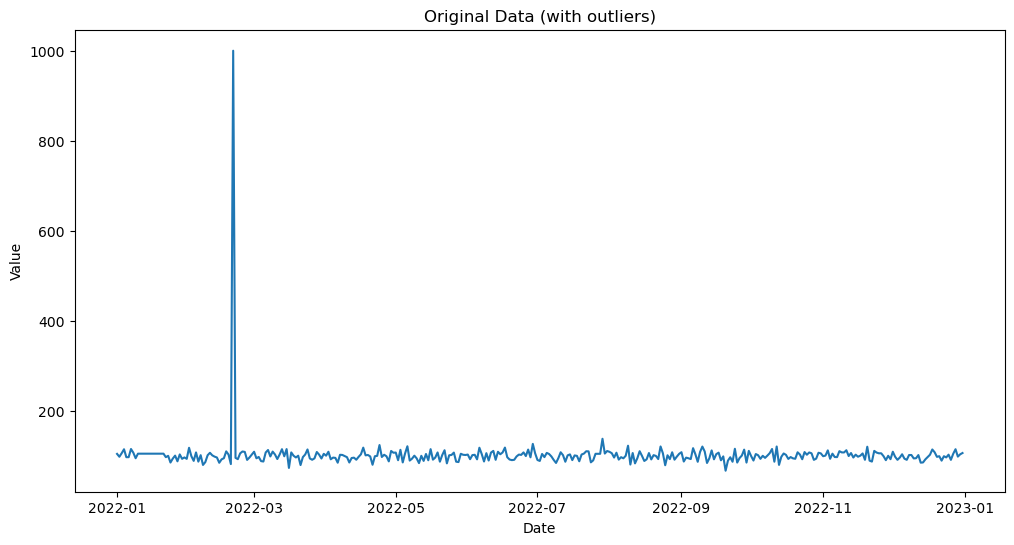

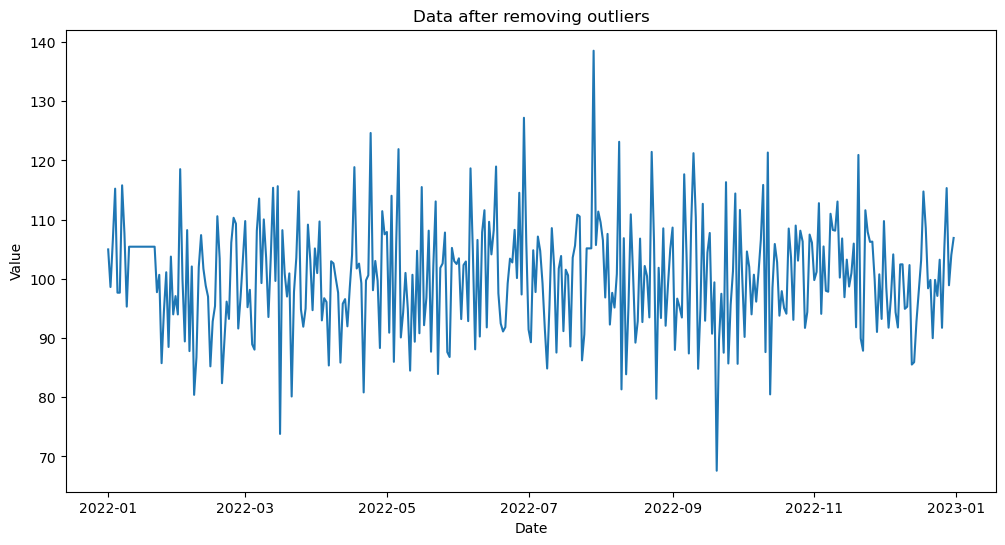

In [12]:
# Function to plot the data
def plot_data(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Value'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

plot_data(df, 'Original Data (with outliers)')

# Remove outliers (you might want to handle these differently based on domain knowledge)
df = df[z_scores < 3]

plot_data(df, 'Data after removing outliers')

## **Business and Product Sense of Data Preparation:**

1. **Importance of Data Cleaning and Preprocessing:**

-  **Business Perspective:**
   - Data Integrity: Clean data is the foundation of reliable business intelligence. Inaccurate data can lead to misguided strategic decisions, potentially costing millions.
   - Risk Mitigation: Proper data preparation reduces the risk of making decisions based on faulty information, which is crucial for regulatory compliance and investor relations.

-  **Product Perspective:**
   - Product Performance Insights: Clean data provides accurate insights into product performance, user behavior, and market trends.
   - Feature Prioritization: Accurate data helps in identifying which product features are truly valuable to users, guiding development priorities.

-  **Decision Making:**
   - Confident Decision Making: Well-prepared data increases confidence in reports and forecasts, leading to more assured decision-making.
   - Resource Allocation: Accurate data ensures resources are allocated based on real needs and opportunities, not data artifacts.

1. **Handling Missing Values and Outliers:**

-  **Business Perspective:**
   - Continuity in Analysis: Missing values, if not handled properly, can break the continuity of time series, leading to skewed trends and unreliable forecasts.
   - Anomaly Detection: Outliers might represent significant business events (like a sudden spike in sales due to a successful campaign) or data errors. Distinguishing between these is crucial for accurate business intelligence.

-  **Product Perspective:**
   - User Experience Insights: In product usage data, missing values might indicate user drop-offs or app crashes, while outliers could reveal power users or potential abuse of the system.
   - Feature Impact Assessment: When assessing the impact of new features, ensuring data completeness and handling outliers is crucial for an accurate evaluation.

2. **Advanced Techniques for Data Preparation:**

-  **Business Perspective:**
   - Sophisticated Imputation Methods: Advanced techniques like Multiple Imputation or using machine learning models to predict missing values can provide more accurate representations of business data.
   - Contextual Outlier Handling: Using domain knowledge to decide whether an outlier represents a genuine business phenomenon or a data error is crucial for maintaining the integrity of business intelligence.

-  **Product Perspective:**
   - Seasonal Adjustments: In product usage or sales data, accounting for seasonality is crucial for understanding true product performance trends.
   - Cohort Analysis: Preparing data for cohort analysis can reveal how different user groups interact with products over time, informing product development strategies.

-  **Decision Making:**
   - Scenario Analysis: Preparing data to support scenario analysis (best case, worst case, most likely case) can enhance strategic planning and risk management.
   - Cross-validation: Using techniques like k-fold cross-validation ensures that insights derived from the data are robust and generalizable.

3. **Importance of Z-scores and Other Outlier Detection Methods:**

-  **Business Implications:**
   - Fraud Detection: In financial data, Z-scores can help identify unusual transactions that might indicate fraud, protecting the company's assets and reputation.
   - Market Anomalies: In market data, outlier detection can reveal unusual market conditions or opportunities that require immediate action.

-  **Product Implications:**
   - Quality Control: In manufacturing or service delivery, Z-scores can help identify products or processes that are performing outside of normal parameters, triggering quality control measures.
   - User Behavior Analysis: Outlier detection in user behavior data can reveal super users or potential misuse of the product, informing both product development and customer engagement strategies.

4. **Advanced Data Preparation for Time Series:**

-  **Business Perspective:**
   - Trend Analysis: Decomposing time series into trend, seasonality, and residual components can provide clearer insights into the underlying drivers of business performance.
   - Forecasting Accuracy: Advanced preparation techniques like differencing or log transformations can significantly improve the accuracy of financial forecasts and market predictions.

-  **Product Perspective:**
   - Feature Engineering: Creating lag variables or rolling statistics can reveal how past product performance or user behavior influences future outcomes, informing predictive features in the product.
   - A/B Testing Preparation: Properly prepared time series data is crucial for accurate A/B testing of product features over time.

-  **Decision Making:**
   - Leading Indicators: Preparing data to identify leading indicators can provide early warnings of market shifts or changing customer preferences, allowing for proactive decision-making.
   - Competitive Analysis: Aligning and preparing time series data from various sources can enable more sophisticated competitive analysis, revealing market share trends and competitive dynamics.
 